## Basic Graphing with matplotlib
* Line graph
* Histogram
* Scatter plot

### Libraries we will be using 
* pep 8 (style guide for Python) suggests these should be in alphabetical order

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from scipy.stats import norm

### Initialization of variable for simulating security price

In [44]:
r = .0525
T = 1/252
sigma = .30
aapl = 189
prices = list()

### Simulation of one possible price path for an arbitrary quarter

In [18]:
for day in range(63):
    prices.append(aapl)
    aapl *= np.exp((r - .5 * sigma ** 2) * T + sigma * np.sqrt(T) * normal(0,1))


### The plot method takes one or two variables and generates a line plot
* there are a long list of methods to augment and annotate your plots
* The semicolon surpresses entraneous output in the notebook setting 

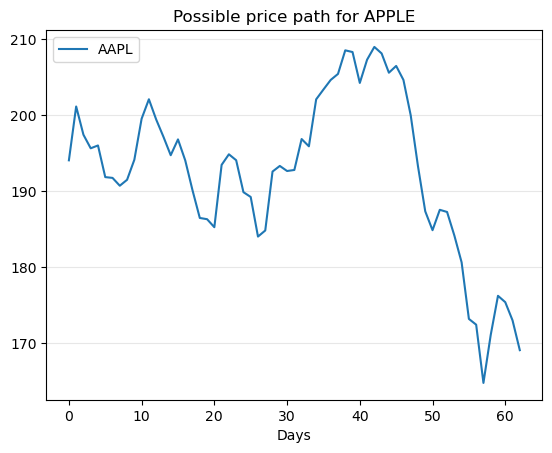

In [36]:
plt.plot(prices, label= "AAPL")
plt.title("Possible price path for APPLE")
plt.grid(axis="y", alpha = .3)
plt.legend(loc = 2)
plt.xlabel("Days")
plt.show();

### Simulation of 5000 possible paths
* reset the price variable before running

In [46]:
for iteration in range(5000):
    aapl = 189
    prices.append([])
    for day in range(63):
        prices[iteration].append(aapl)
        aapl *= np.exp((r - .5 * sigma ** 2) * T + sigma * np.sqrt(T) * normal(0,1))

### Plot the first 10 paths
* as you can see it is easy to plot many lines on the same graph
* everyt time you use `plt.` it effects the current plot

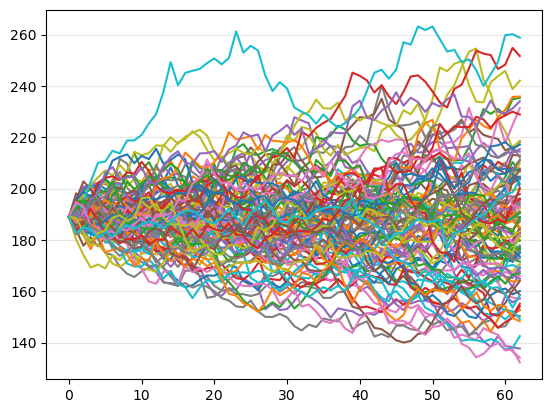

In [49]:
for path in range(100):
    plt.plot(prices[path])
    
plt.grid(axis = "y", alpha=.3)    

### Peel off the last value in each path and store in a new variable

In [50]:
data = list()
for row in range(5000):
    data.append(prices[row][-1])

In [51]:
data[:10]

[188.19019698693432,
 190.37582619296438,
 235.3886473219582,
 177.02855307769792,
 157.3200100978404,
 197.87722508705815,
 207.93151179417828,
 184.17097194685437,
 192.26470415813168,
 152.68275794102257]

### Let's make a histogram of each path's ending price!
* plot data
* overlay a theoretical normal curve based on scipy normal model to see how the data fits
* Since a stocks price in the future generally reflects a lognormal ditribution, the overlay is more open-ended on the left

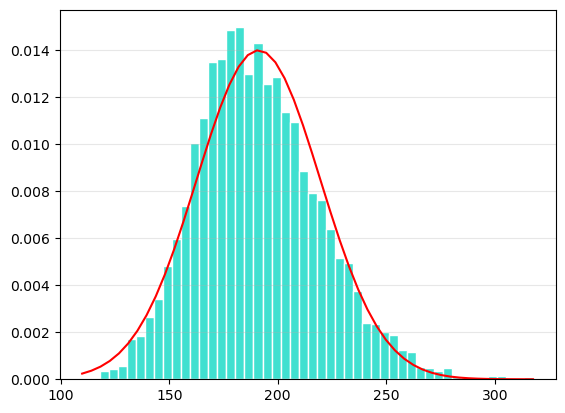

In [71]:
plt.hist(data, bins=50, density = True, color="#40e0d0", edgecolor='w')
x = np.linspace(min(data), max(data))
mean, std = norm.fit(data)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf, c='r')
plt.grid(axis='y', alpha=.3);

### Using Seaborn to generate a simple histogram
* the kde (kernel density estimate) is not quite the thing as the previous normal overlay

<Axes: ylabel='Count'>

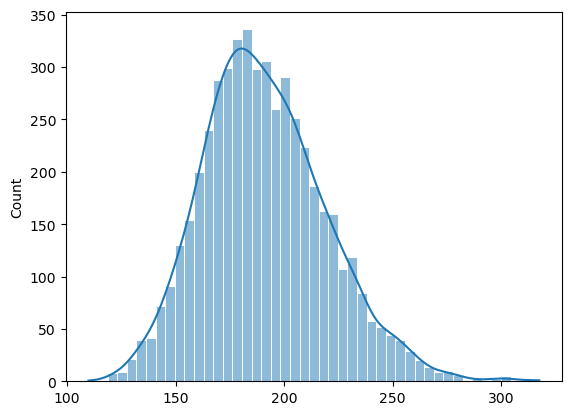

In [76]:
import seaborn as sb

sb.histplot(data, kde=True, edgecolor='w')

In [163]:
### Scatter Plots

### Using NumPy to fit a simple regression model 

### Assign the output of the model to appropriate variables

### Plot the original data and least squares (regression) line 

### When generating random numbers it is sometime preferable to generate a constant stream
* This can be done by creating a default generator 
* Often this is referred to as the random seed

### There is a so-called object-oriented method of using matplotlib
* This involves assigning variables for two matplotlib objects
* These variables are commonly called fig and ax or axes
* This methodology may allow greater control over your output
* There are syntactic differences when using this method

### Your work can be saved out to typical image formats (.png, .jpg)